<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [124]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [125]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [126]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [127]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [128]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [129]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<AxesSubplot:>

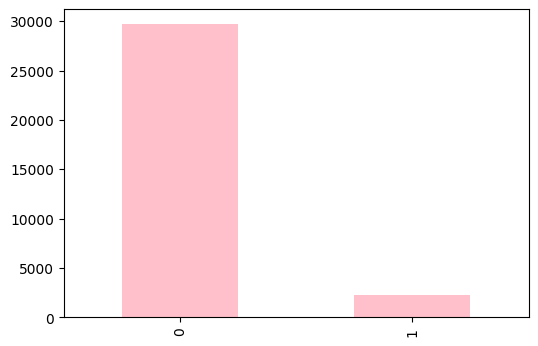

In [130]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

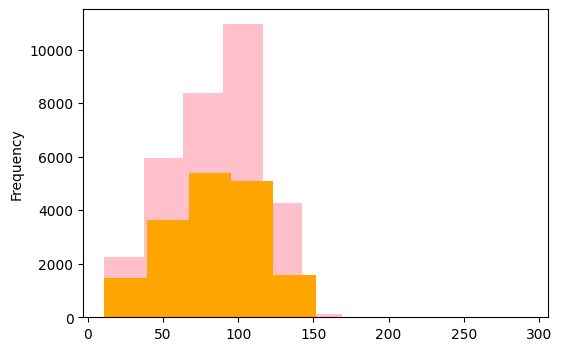

In [131]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [132]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [133]:

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

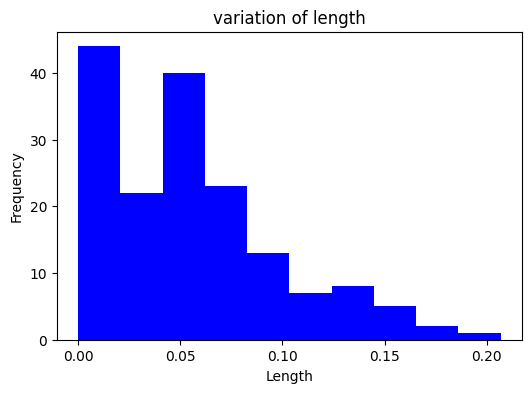

In [134]:
train.groupby('len').mean()['label'].plot.hist(color = 'blue', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

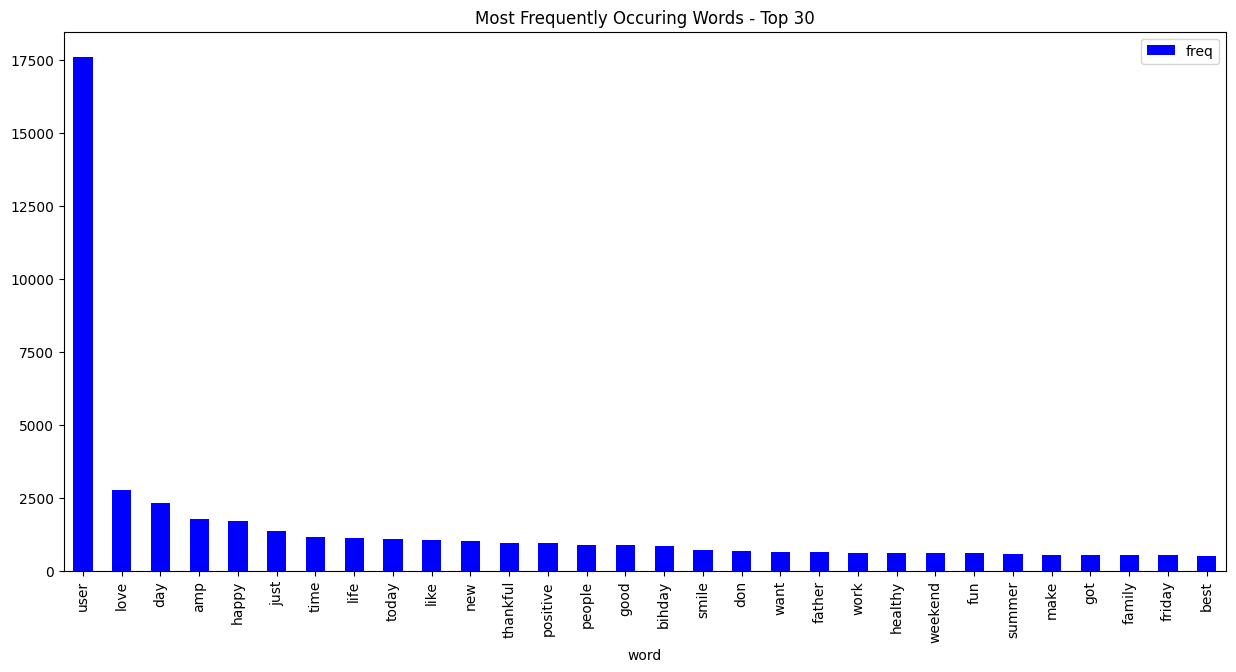

In [135]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

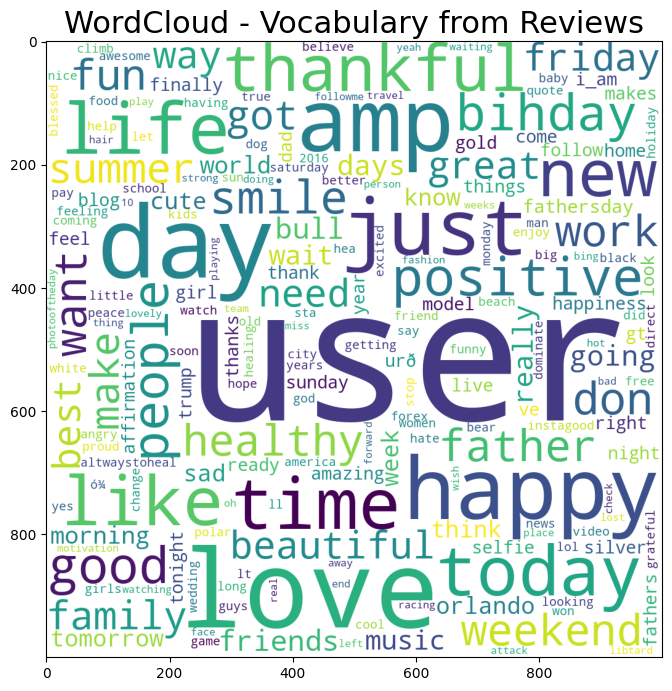

In [136]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

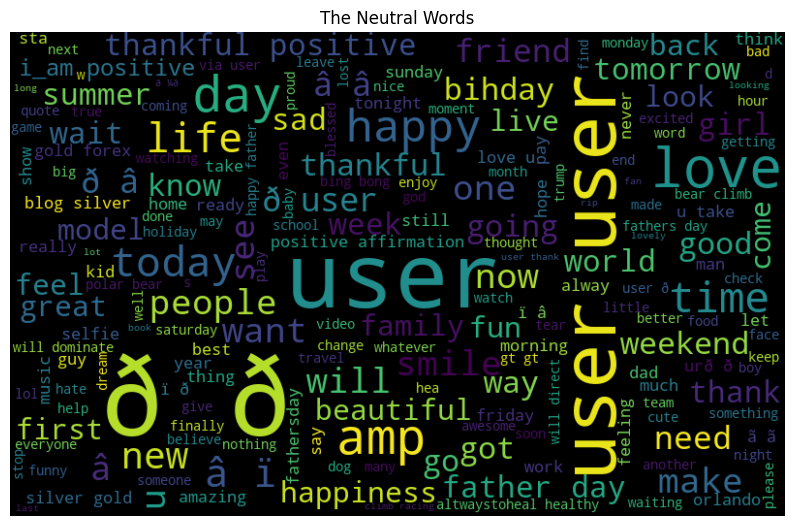

In [137]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


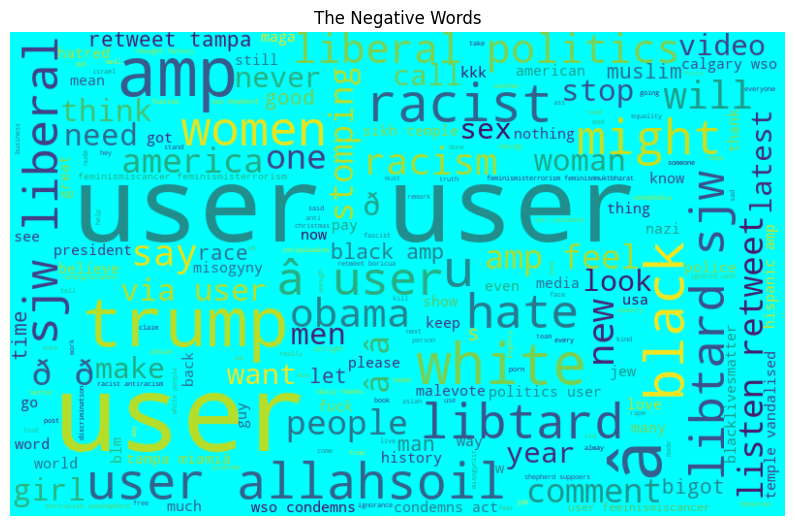

In [138]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [139]:
# collecting the hashtags

import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [140]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

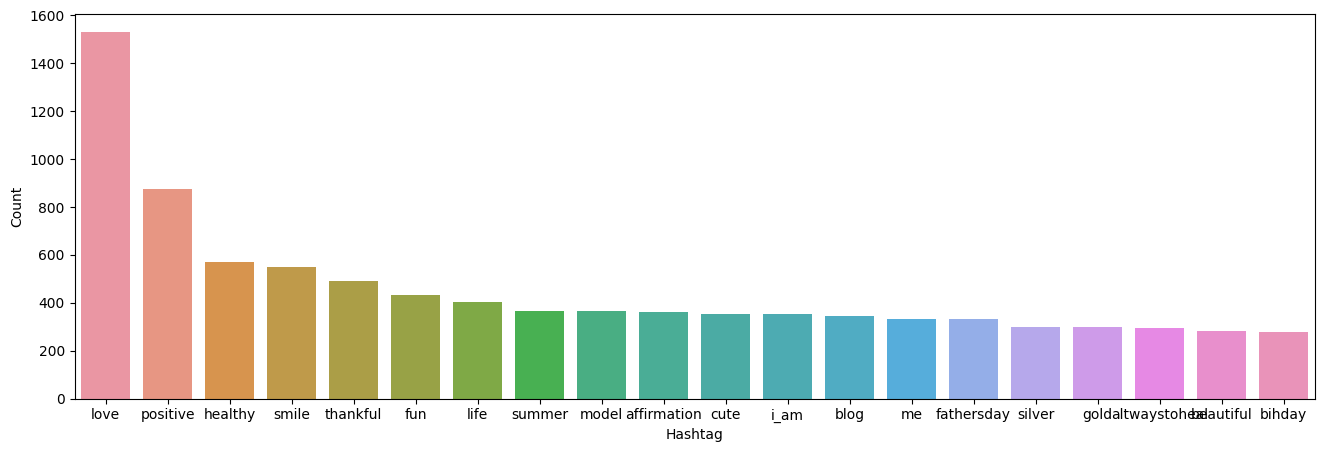

In [141]:
import nltk 
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

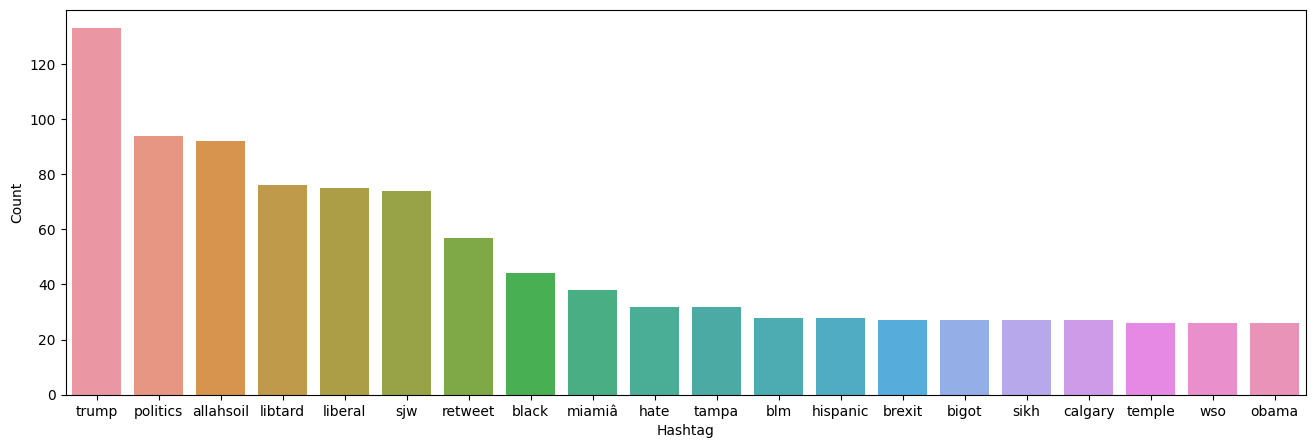

In [142]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [143]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109793, 8411580)

In [144]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6755543351173401),
 ('#prosecco', 0.6243957281112671),
 ('#wanderlust', 0.6076565980911255),
 ('fluffy', 0.5977992415428162),
 ('#deutschland', 0.5921006202697754),
 ('7!', 0.5861908197402954),
 ('#restaurant', 0.5840893983840942),
 ('#boardgames', 0.5819617509841919),
 ('coaching', 0.5805203318595886),
 ('#demoday', 0.5782756209373474)]

In [145]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7064191699028015),
 ('level.', 0.6951672434806824),
 ('ways.', 0.6891889572143555),
 ('tolerance', 0.6859402060508728),
 ('aol', 0.6855584979057312),
 ('ownership', 0.6848843097686768),
 ('#merica', 0.6822943687438965),
 ('intelligent', 0.6808282136917114),
 ('spots.', 0.6804139614105225),
 ('law.', 0.6786484718322754)]

In [146]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.7113512754440308),
 ('"mytraining"', 0.708437979221344),
 ('training"', 0.6878891587257385),
 ('app,', 0.645531177520752),
 ('"my', 0.6086342930793762),
 ('app', 0.5953741073608398),
 ('bees', 0.583091139793396),
 ('heroku', 0.5740290284156799),
 ('ta', 0.5685428977012634),
 ("domino's", 0.5628836154937744)]

In [147]:
model_w2v.wv.most_similar(negative = "hate")

[('#staup', 0.02130398154258728),
 ('â\x9c\x88ï¸\x8f', 0.016854560002684593),
 ('#css', 0.007617585361003876),
 ('#crafts', -0.0015023626619949937),
 ('lion', -0.0017015726771205664),
 ('street,', -0.0029644216410815716),
 ('#ireland', -0.003001994453370571),
 ('#foodie', -0.004435705952346325),
 ('#inlove', -0.00584700983017683),
 ('#ebay', -0.009254195727407932)]

In [148]:
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")


In [149]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [150]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91707\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] 
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [152]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [153]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [154]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [155]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [156]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9513202352646728
Precision score : 0.965499008592201
Recall score : 0.9827771797631862
Accuracy score : 0.9513202352646728
f1 score : 0.6050761421319797


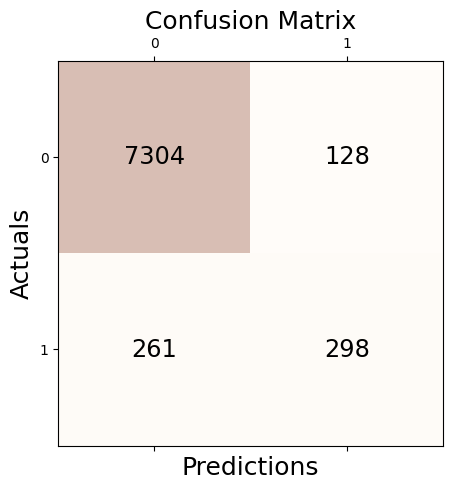

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

# confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

recall_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[0][1])
precision_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[1][0])
accuracy_score = (conf_matrix[0][0] + conf_matrix[1][1]) / \
            (conf_matrix[0][0] + conf_matrix[0][1] +
             conf_matrix[1][0] + conf_matrix[1][1])

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Precision score :", precision_score)
print("Recall score :", recall_score)
print("Accuracy score :", accuracy_score)


# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# print(cm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j],
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



c:\Users\91707\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
Precision score : 0.970421393841167
Recall score : 0.9667653390742734
Accuracy score : 0.9416843949443123
f1 score : 0.5933682373472949


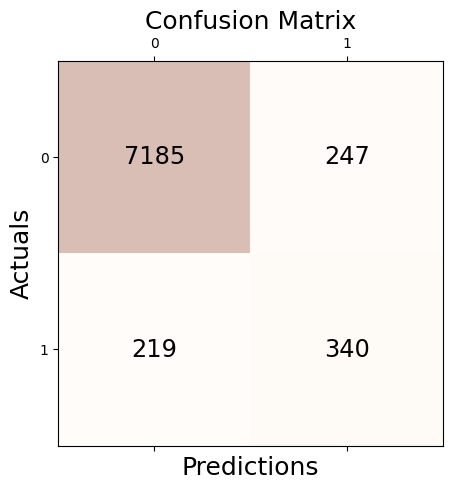

In [158]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

# confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        recall_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[0][1])
        precision_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[1][0])
        accuracy_score = (conf_matrix[0][0] + conf_matrix[1][1]) / \
            (conf_matrix[0][0] + conf_matrix[0][1] +
             conf_matrix[1][0] + conf_matrix[1][1])

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Precision score :", precision_score)
print("Recall score :", recall_score)
print("Accuracy score :", accuracy_score)


# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# print(cm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j],
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9312977099236641
Precision score : 0.9663911099064914
Recall score : 0.9594994617868676
Accuracy score : 0.9312977099236641
f1 score : 0.5311699402220323


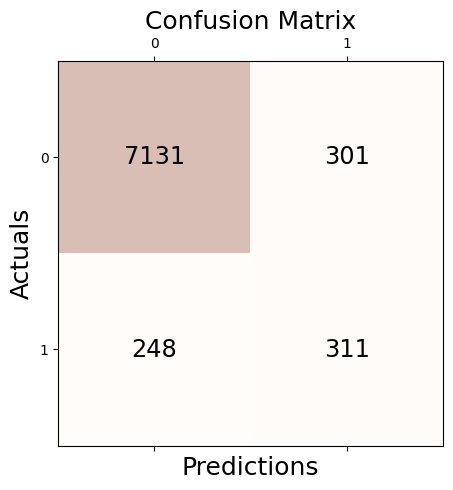

In [159]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

# confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        recall_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[0][1])
        precision_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[1][0])
        accuracy_score = (conf_matrix[0][0] + conf_matrix[1][1]) / \
            (conf_matrix[0][0] + conf_matrix[0][1] +
             conf_matrix[1][0] + conf_matrix[1][1])

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Precision score :", precision_score)
print("Recall score :", recall_score)
print("Accuracy score :", accuracy_score)


# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# print(cm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j],
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [160]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

# confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        recall_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[0][1])
        precision_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[1][0])
        accuracy_score = (conf_matrix[0][0] + conf_matrix[1][1]) / \
            (conf_matrix[0][0] + conf_matrix[0][1] +
             conf_matrix[1][0] + conf_matrix[1][1])

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Precision score :", precision_score)
print("Recall score :", recall_score)
print("Accuracy score :", accuracy_score)


# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# print(cm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j],
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Training Accuracy : 0.9603687789412206
Validation Accuracy : 0.9555750218996371
Precision score : 0.958651976668827
Recall score : 0.9951560818083961
Accuracy score : 0.9555750218996371
f1 score : 0.5748502994011976


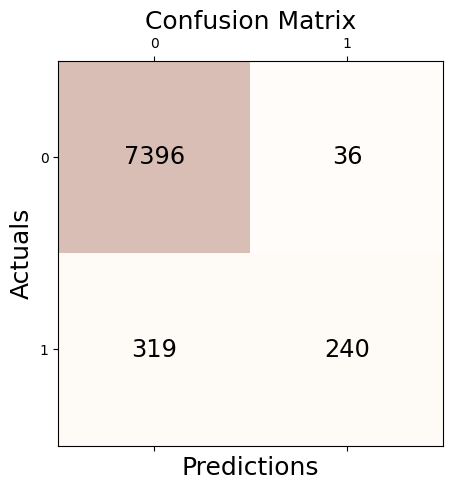

In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

# confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        recall_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[0][1])
        precision_score = conf_matrix[0][0] / \
            (conf_matrix[0][0] + conf_matrix[1][0])
        accuracy_score = (conf_matrix[0][0] + conf_matrix[1][1]) / \
            (conf_matrix[0][0] + conf_matrix[0][1] +
             conf_matrix[1][0] + conf_matrix[1][1])

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Precision score :", precision_score)
print("Recall score :", recall_score)
print("Accuracy score :", accuracy_score)


# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# print(cm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j],
                va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()